In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline

#basic variable creation and printing

x = [5,4,5]
for i in x:
    print (i)
print (x [1:])
print (x [:2])

#creating and printing arrays using numpy

twod = np.array([[1,2], [3,4]])
print(twod [1:, 1])

#basic method creation

def noDefault(a, b, c):
    print (a, b, c)
    return 4
noDefault(66, 77, 88)

def withDefault(a, b, c= 99):
    print (a, b, c)
withDefault(11, 22)

def withMultipleDefault(a, b, c= 99, d=100):
    print (a, b, c, d)
withMultipleDefault(11, 22, d=33)

In [30]:
#using panda to read data from files and 

training_data = pd.read_csv("Iris.csv")
#visualizing data
print (training_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


def x():
    return 1, 2, 3, 4, 5

a, b, c, d, e = x()

In [66]:
classes = training_data["Species"]
uniques = np.unique(classes)
onehot_classes = np.zeros((len(classes), len(uniques)))
for i, species in enumerate(uniques):
    onehot = np.zeros(len(uniques))
    onehot[i] = 1
    onehot_classes[classes == species] = onehot

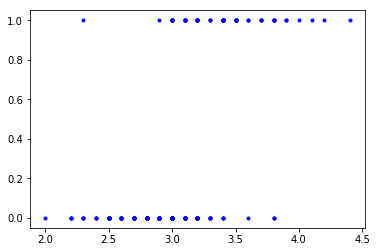

In [106]:
plt.plot(training_data["SepalWidthCm"], onehot_classes[:, 0], 'b.')

In [119]:
def normalizing (a):
    maxi = np.max(a)
    mini = np.min(a)
    return (a - mini) / (maxi - mini)

In [120]:
def sigmoid (a):
    return (1) / (1 + np.exp(-a))

In [121]:
def softmax (x):
    e_x = np.exp(x - np.max(x))
    summations = np.sum(e_x, axis = 1)
    summations = summations.reshape(len(summations), 1)
    return e_x / summations

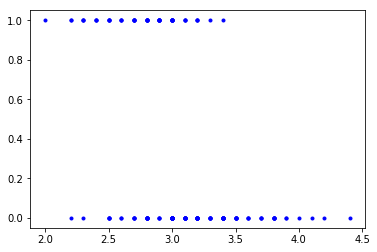

In [131]:
plt.plot(training_data["SepalWidthCm"], onehot_classes[:, 1], 'b.')

features = ["PetalLengthCm", "PetalWidthCm", ]
trainX = np.array(training_data[features]).reshape((-1, len(features)))
trainX = normalizing(trainX)
constants = np.ones(trainX.shape[0]).reshape((-1, 1))
trainX = np.hstack((trainX, constants))
#reshape turns a list of values into a matrix
trainY = (onehot_classes)

[[-15.26683523   0.622784    17.64405123]
 [  7.7981787    3.18186536  -7.98004406]]
0.10067604865630853
0.9533333333333334


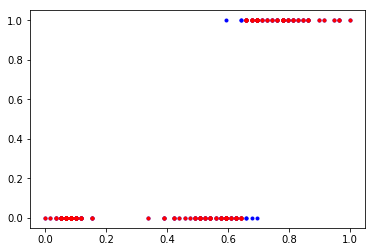

In [151]:
#Gradient dissent alg

#creates matrix with proper collums equal to the number of features plus 1
weights = np.ones( (trainX.shape[1], len(uniques)) )

epochs = 10000
learningRate = 0.16
for i in range(epochs):
    hypothesis = np.matmul(trainX, weights)
    hypothesis = softmax(hypothesis)
    errorish = hypothesis - trainY
    gradients = np.matmul(np.transpose(trainX), errorish) / trainX.shape[0]
    delta = gradients * learningRate
    weights = weights - delta
print (weights)
hypothesis = np.matmul(trainX, weights)

hypothesis = softmax(hypothesis)

errorish = hypothesis - trainY
error = (np.sum(errorish ** 2) / errorish.shape[0])


print (error)

hypothesis[hypothesis <= 0.5] = 0
hypothesis[hypothesis > 0.5] = 1

print ( np.sum (np.all(np.equal(hypothesis, trainY), axis=1)) / len(trainY))

plt.plot(trainX[:, 0], trainY[:, 2], 'b.')
plt.plot(trainX[:, 0], hypothesis[:, 2], 'r.')